In [1]:
import os

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos             = '../Data/RAW/'
datos_es          = '../Data/RAW_ES/'

In [5]:
for b in os.listdir(datos_es):
    print(b)

ES_ABANCA
ES_BANCO_VALENCIA
ES_CATALUNYA_BANC


In [6]:
data_sent_full    = '../Data/PREP/sentiment_full.parquet'

In [8]:
df = pd.read_parquet(data_sent_full)

In [12]:
df.reset_index()['year'].max()

'2021'

In [7]:
#pip install openpyxl

In [9]:
df = pd.read_excel('../Data/m&a.xlsx')
df.head()

,newbank,bank_1,bank_2,bank_3,bank_4,date,country_1,country_2
0,CaixaBank,CaixaBank,Bankia,NaN,NaN,2021-12-11,ES,ES
1,Unicaja-Liberbank,Unicaja,Liberbank,NaN,NaN,2021-07-29,ES,ES
2,Unicaja,Unicaja,Caja de Jaen,NaN,NaN,2010-11-05,ES,ES
3,Unnim Caixa,Caixa Manlleu,Caixa Sabadell,Caixa Terrassa,NaN,2010-06-29,ES,ES
4,Catalunya Caixa,Caixa Catalunya,Caixa Tarragona,Caixa Manresa,NaN,2010-06-30,ES,ES


Text(0, 0.5, 'Distribution')

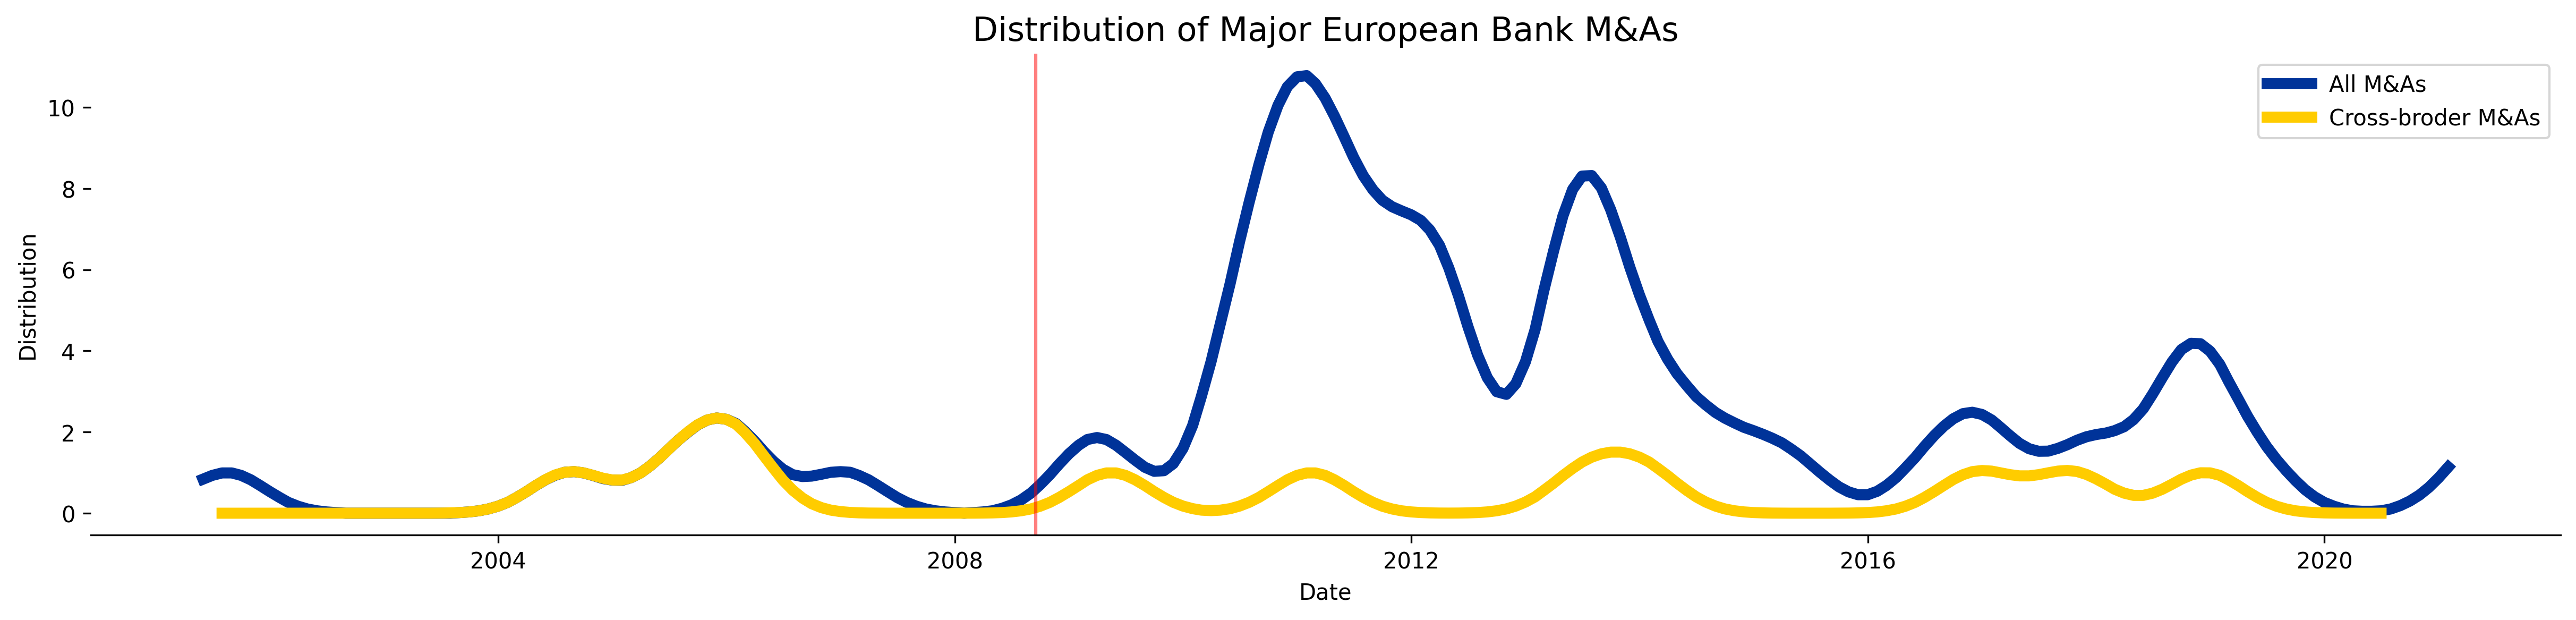

In [91]:
timeline = df.copy()[['date']]
timeline['count'] = 1
timeline = timeline.set_index('date').resample('1M').sum().rolling(24, center=True, win_type='gaussian').sum(std=4)

cross_broder_timeline = df.copy()[df.country_1 != df.country_2][['date']]
cross_broder_timeline['count'] = 1
cross_broder_timeline = cross_broder_timeline.set_index('date').resample('1M').sum().rolling(36, center=True, win_type='gaussian').sum(std=4).bfill()

lehman_brothers = '2008-09-15'
austerity_measures = '2010-01-01'

fig, ax = plt.subplots(figsize=(20,4), dpi=300)
sns.lineplot(data=timeline.reset_index(), x='date', y='count', linewidth=5, label='All M&As', color='#003399', ax=ax)
sns.lineplot(data=cross_broder_timeline.reset_index(), x='date', y='count', linewidth=5, label='Cross-broder M&As', color='#FFCC00', ax=ax)

ax.axvline(x=pd.to_datetime(lehman_brothers), color='red', alpha=.5)
# ax.axvline(x=pd.to_datetime(austerity_measures), color='red', alpha=.5)

ax.set_title('Distribution of Major European Bank M&As', size=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Date')
ax.set_ylabel('Distribution')

In [82]:
pd.to_datetime(lehman_brothers)

Timestamp('2008-09-15 00:00:00')